Outliers can be detected by:
1. Boxplots
2. Scatter plot

Outliers can be removed by:
1. IQR-method - (Mostly used when the data is skewed)
2. Z-Score method - (Mostly used when data is normally or almost normally distributed)
3. Percentile method

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [54]:
train_data = pd.read_csv('train.csv')

In [55]:
num = train_data.columns[train_data.dtypes!=object]
num = train_data[num]

In [56]:
num.shape

(1460, 38)

In [57]:
num_behaving_as_categorical = num[['MSSubClass','OverallQual','OverallCond','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','3SsnPorch','PoolArea','MiscVal','MoSold','YrSold']]

In [58]:
num.drop(num_behaving_as_categorical.columns,inplace=True,axis=1)

In [59]:
num.shape

(1460, 20)

In [60]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1452 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  GarageYrBlt    1379 non-null   float64
 14  GarageArea     1460 non-null   int64  
 15  WoodDeckSF     1460 non-null   int64  
 16  OpenPorchSF    1460 non-null   int64  
 17  EnclosedPorch  1460 non-null   int64  
 18  ScreenPo

In [61]:
num.drop(['SalePrice'],axis=1,inplace=True)

In [62]:
num['HouseAge'] = 2021-num['YearBuilt']
num['Remodeled'] = num['YearRemodAdd']-num['YearBuilt']

In [63]:
num.drop(['YearBuilt','YearRemodAdd'],axis=1,inplace=True)

In [64]:
num.shape

(1460, 19)

In [65]:
num.drop(['Id'],axis=1,inplace=True)

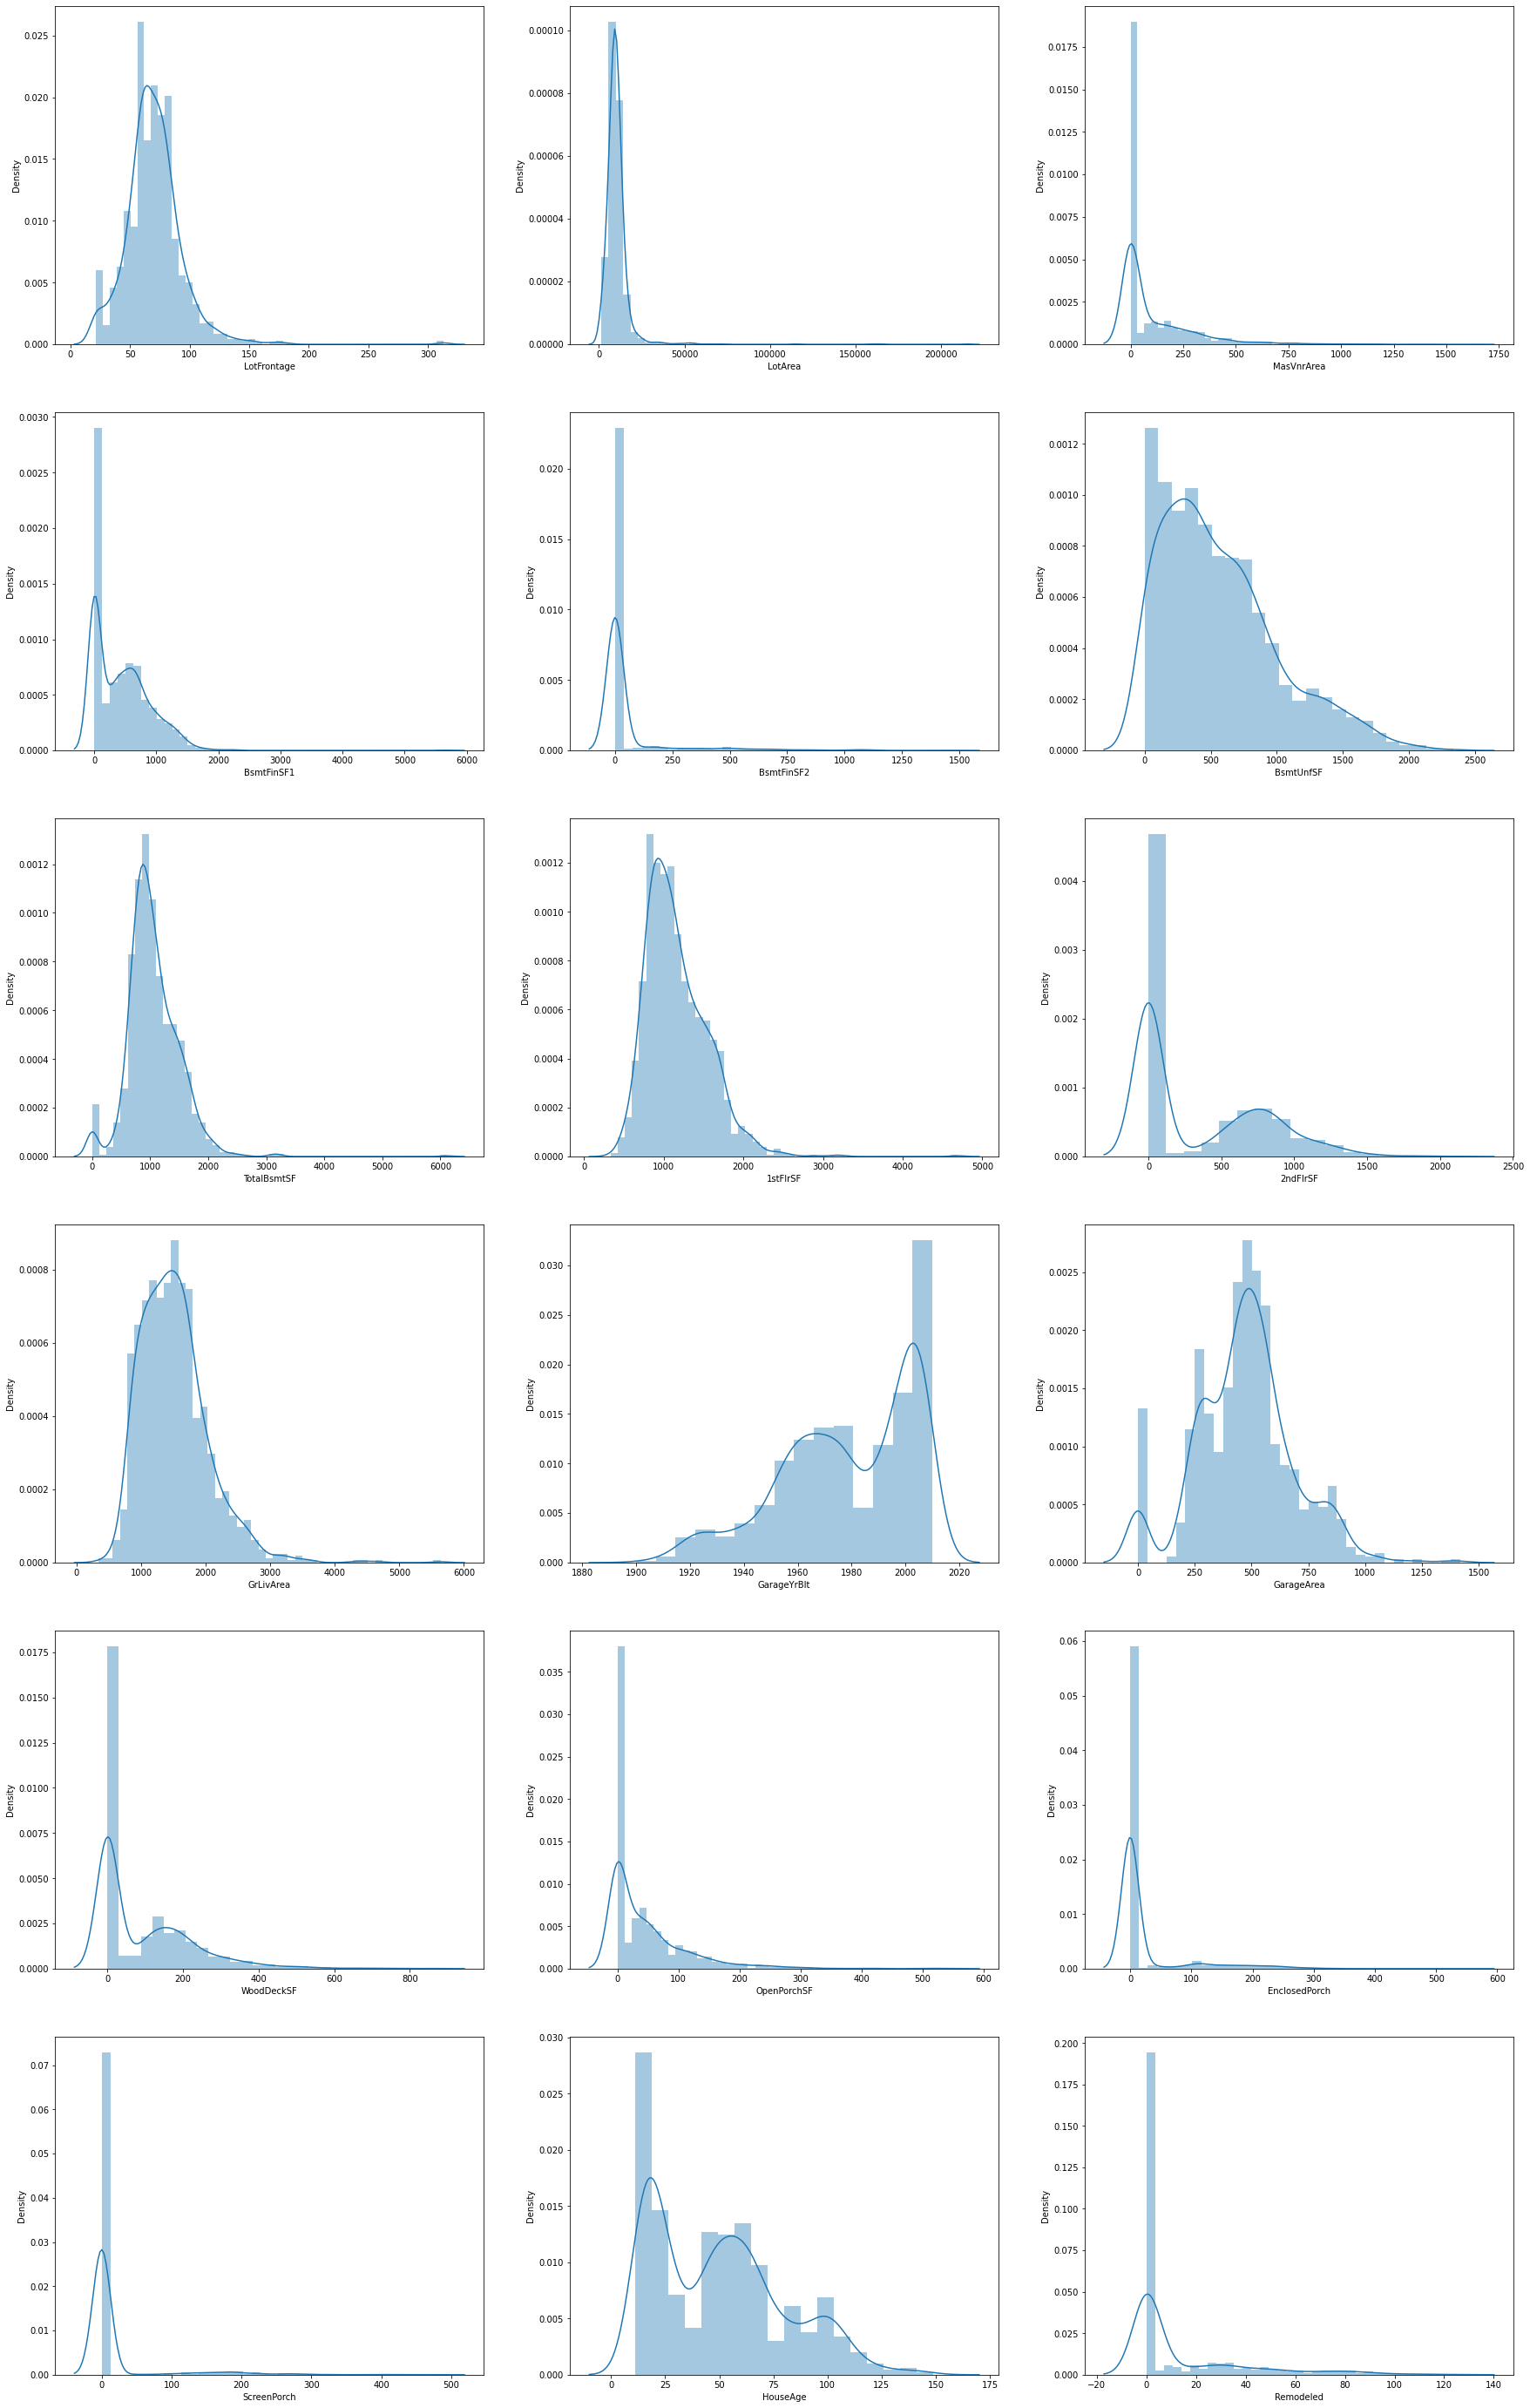

In [22]:
plt.figure(figsize=(30,50))
for i in enumerate(num.columns):
    plt.subplot(6,3,i[0]+1)
    sb.distplot(num[i[1]])

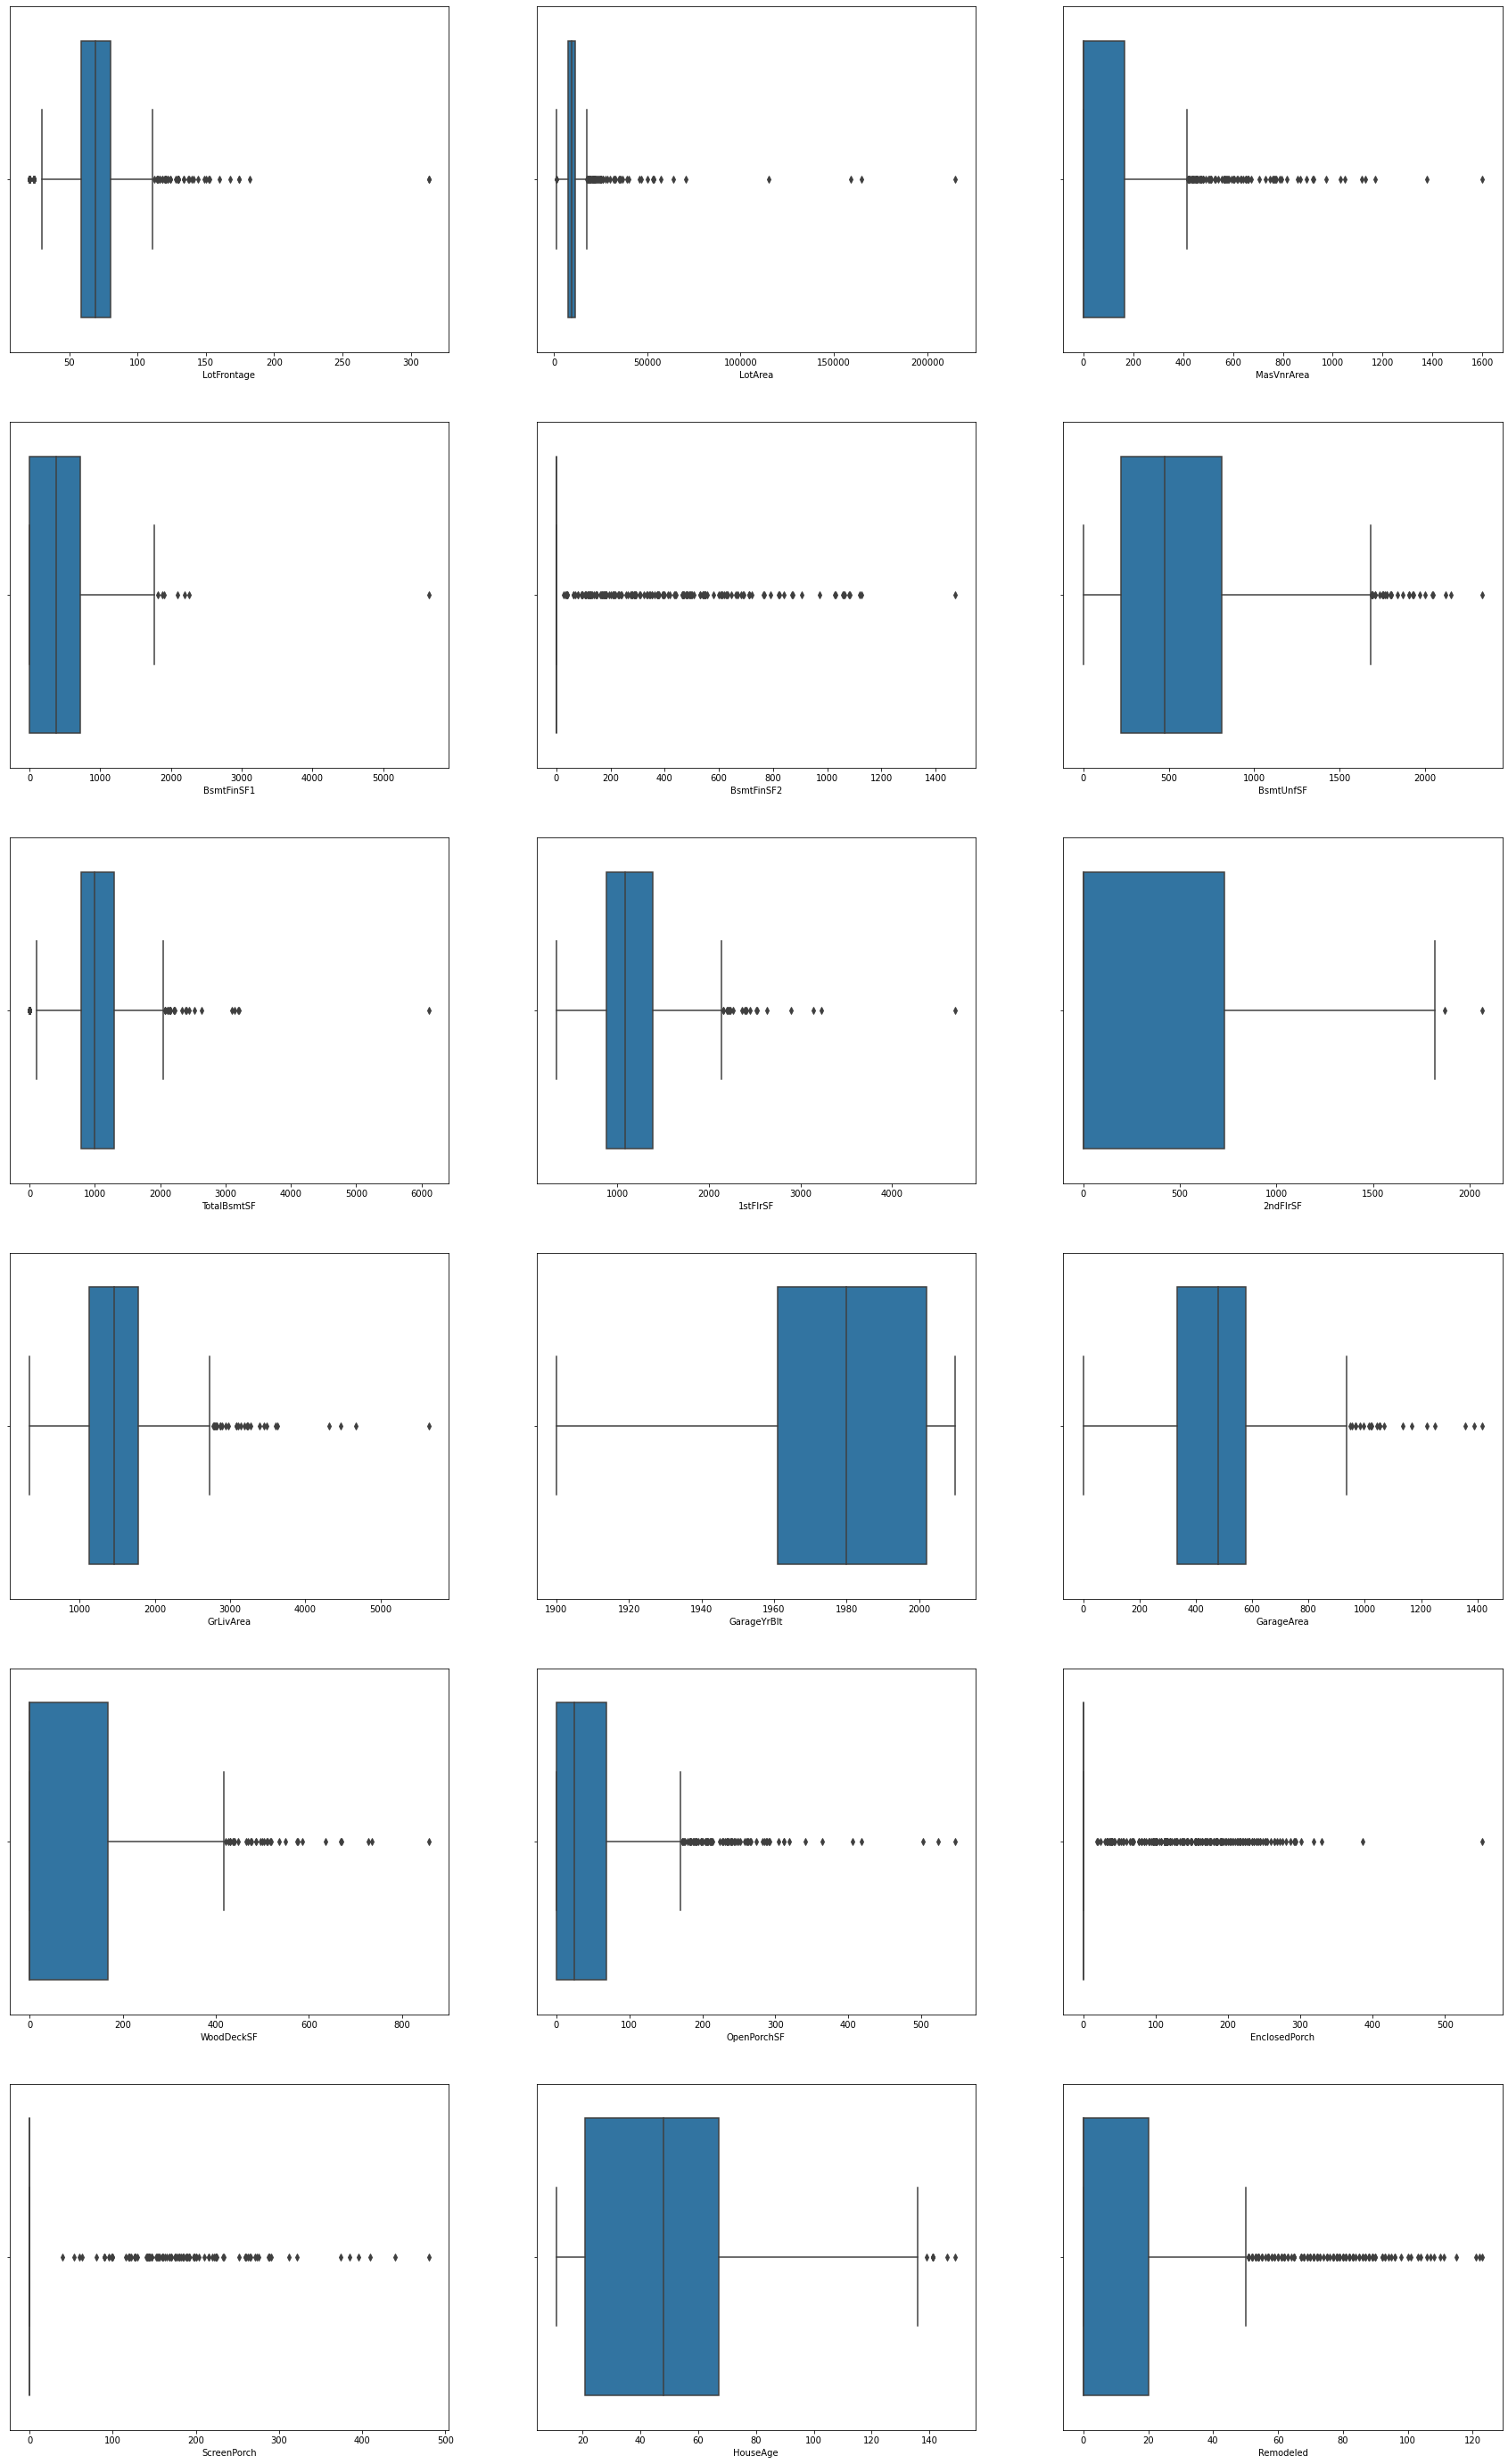

In [33]:
plt.figure(figsize=(30,50))
for i in enumerate(num.columns):
    plt.subplot(6,3,i[0]+1)
    sb.boxplot(num[i[1]])

# Outlier Removal Using IQR method

#### For single column

In [ ]:
#Applying IQR
Q1 = num['LotFrontage'].quantile(0.25)
Q3 = num['LotFrontage'].quantile(0.75)
IQR = Q3-Q1
LL = Q1-1.5*IQR
UL = Q3+1.5*IQR

#Finding Outlier
num[num['LotFrontage'] > UL]

#Trimming
num_new = num[num['LotFrontage'] < UL]

#Capping
num['LotFrontage'] = np.where((num['LotFrontage']>UL),UL,
                     np.where((num['LotFrontage']<LL),LL,num['LotFrontage']))

In [47]:
mul_demo = num[['LotArea','MasVnrArea']]

#### For multiple columns

In [48]:
def outlier(col):
    Q1 = mul_demo[col].quantile(0.25)
    Q3 = mul_demo[col].quantile(0.75)
    IQR = Q3-Q1
    LL = Q1-1.5*IQR
    UL = Q3+1.5*IQR
    mul_demo[col] = np.where((mul_demo[col]>UL),UL,
                     np.where((mul_demo[col]<LL),LL,mul_demo[col]))

In [49]:
for i in mul_demo.columns:
    outlier(i)

# Outlier Removal using z-score method

In [ ]:
#Applying z-score
LL = num[col].mean()-3*num[col].std()
UL = num[col].mean()+3*num[col].std()

#Finding the outlier
outliers = num[(num[col]>UL | num[col]<LL)]

#Trimming
new_num = num[(num[col]>LL) & (num[col]<UL)]

#Capping
num[col] = np.where((num[col]>UL),UL,
                     np.where((num[col]<LL),LL,num[col]))

# Outlier Removal using Percentile

In [ ]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

def outlier(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return x

num = num.apply(outlier)